# Selforganizing Map

Implementation based on Tensorflow.
Because we want a spatial division of our prices, we need the whole dataset. But we only use 3 Prices a day to thin out the amount of data

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
np.set_printoptions(precision=5, suppress=True)

from sqlalchemy import create_engine

def create_connection():
    host = 'localhost'
    port = '3333'
    return create_engine("postgresql://infocup@{}:{}/infocup".format(host,port))

In [15]:
con = create_connection()

active_stations = pd.read_sql_query("""SELECT station_id,time_stamp, price 
FROM prices_sampled 
WHERE date_part('hour', time_stamp)::int %% 8 = 0
AND time_stamp >= '2017-06-01' limit 100000""", con)

active_stations.head(10)

,station_id,time_stamp,price
0,5338,2017-06-01 00:00:00,1429
1,5338,2017-06-01 08:00:00,1389
2,5338,2017-06-01 16:00:00,1329
3,5338,2017-06-02 00:00:00,1429
4,5338,2017-06-02 08:00:00,1389
5,5338,2017-06-02 16:00:00,1319
6,5338,2017-06-03 00:00:00,1429
7,5338,2017-06-03 08:00:00,1379
8,5338,2017-06-03 16:00:00,1309
9,5338,2017-06-04 00:00:00,1429


In [17]:
import numpy as np
active_stations = active_stations.sample(n=1000)


In [18]:
active_stations['time_stamp'] = active_stations['time_stamp'].astype(np.int64) // 10**9
data_np = active_stations.as_matrix()
ids = active_stations.as_matrix(columns=['station_id']).flatten()
data_np

array([[      5479, 1503100800,       1309],
       [      5640, 1497110400,       1269],
       [      5641, 1498464000,       1339],
       ..., 
       [      5477, 1500163200,       1439],
       [      5395, 1504800000,       1339],
       [      5545, 1500220800,       1309]])

In [19]:
import som

som = som.SOM(20, 30, 3, 100)

som.train(data_np)


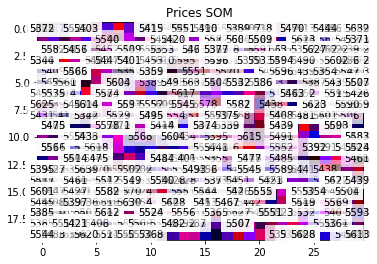

In [20]:

#Get output grid
image_grid = som.get_centroids()
 
#Map colours to their closest neurons
mapped = som.map_vects(data_np)

#Plot
plt.imshow(image_grid)
plt.title('Prices SOM')
for i, m in enumerate(mapped):
    plt.text(m[1], m[0], ids[i], ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.5, lw=0))
plt.show()

SyntaxError: invalid syntax (<ipython-input-34-3fbcd3d988ea>, line 11)